# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
# sns.set_palette('viridis')

sns.set(style='whitegrid', palette='viridis')

%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [46]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [47]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [48]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

aggregate_data = df.groupby('Year').agg(['mean'])
# Now rename columns to keep the original names
aggregate_data.columns = [col[0] for col in aggregate_data.columns]  # Flatten column names


print(aggregate_data.head())

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1900                        14.506663               350.373405   
1901                        14.485343               349.757140   
1902                        14.476262               349.299686   
1903                        14.492360               349.644375   
1904                        14.494241               349.537032   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1900           150.408288                       8.978659  
1901           150.548828                       8.947272  
1902           152.174821                       9.035554  
1903           150.138338                       9.056501  
1904           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
## TODO: Perform univariate analysis for each climate variable
## Include descriptive statistics and appropriate visualizations
## Your code here




# Analyze Global Average Temperature (°C) 

count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


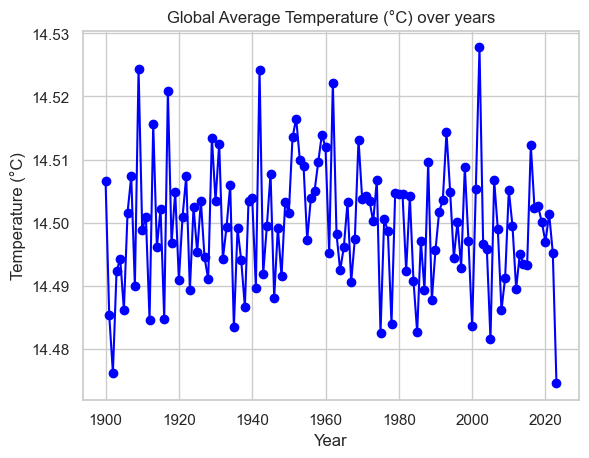

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1909                        14.524320               349.477657   
1942                        14.524255               350.000929   
2002                        14.527762               349.865402   
2023                        14.474559               351.003294   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1909           149.091689                       9.020469  
1942           149.584292                       9.034496  
2002           149.515011                       8.905268  
2023           148.355918                       8.984517  


Text(0.5, 1.0, 'Temperature Boxplot')

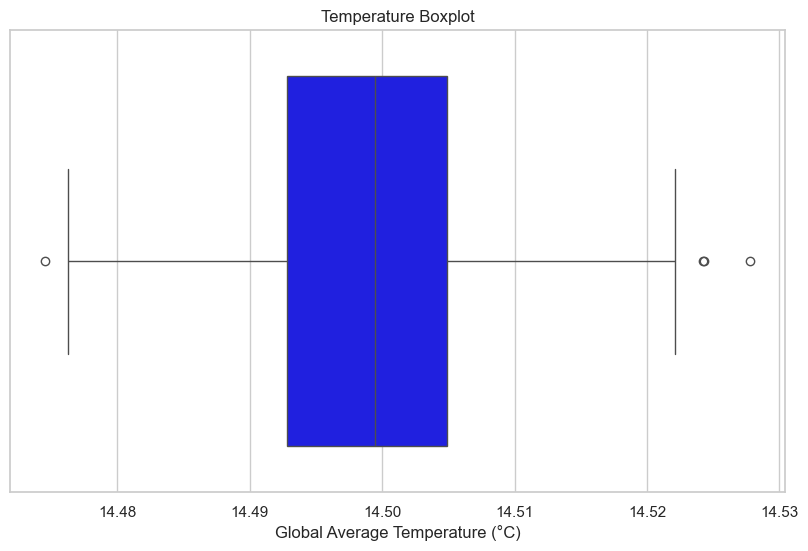

In [71]:

# Analyze Global Average Temperature (°C) 
summary = aggregate_data['Global Average Temperature (°C)'].describe()
print(summary)


# Plotting 
plt.plot(aggregate_data.index, aggregate_data['Global Average Temperature (°C)'],marker='o', color='b', linestyle='-', label='Temperature')
plt.title('Global Average Temperature (°C) over years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Global Average Temperature (°C)'].quantile(0.25)
Q3 = aggregate_data['Global Average Temperature (°C)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Global Average Temperature (°C)'] < lower_bound) | (aggregate_data['Global Average Temperature (°C)'] > upper_bound)]

# Display the outliers
print(outliers)

# Boxplot to visualize spread and detect outliers
plt.figure(figsize=(10, 6))

# Boxplot for Temp
sns.boxplot(x= aggregate_data['Global Average Temperature (°C)'] ,color='b')
plt.title('Temperature Boxplot')



# CO2 Concentration (ppm)

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


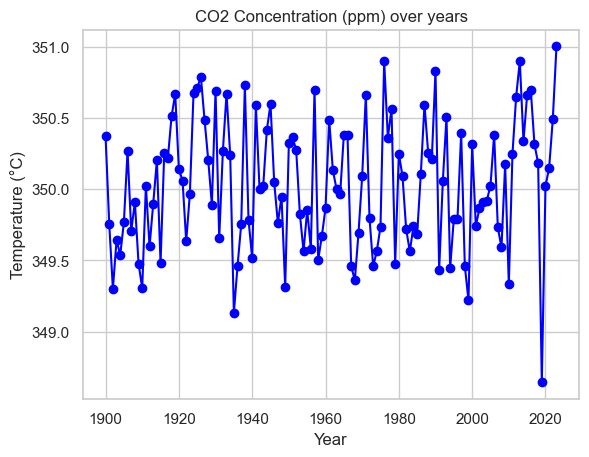

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
2019                        14.500105               348.642249   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
2019           151.020415                        9.01469  


Text(0.5, 1.0, 'CO2 Concentration (ppm)')

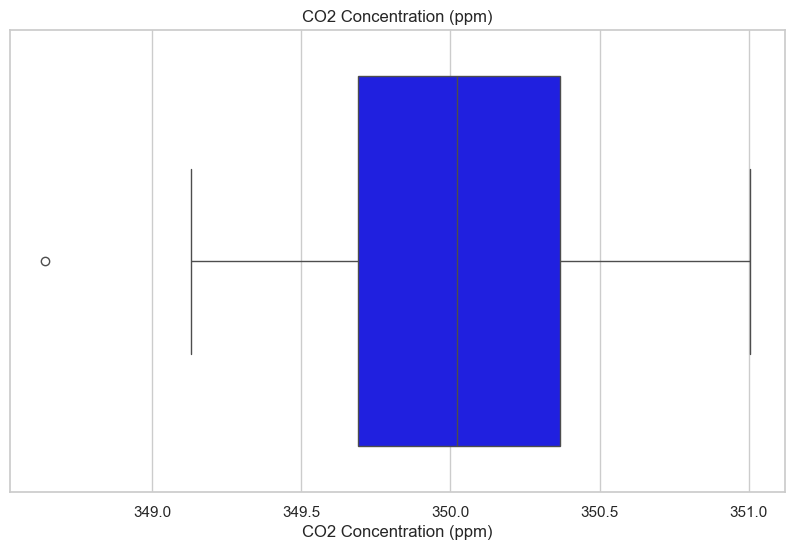

In [79]:
# Analyze Global Average Temperature (°C) 
summary = aggregate_data['CO2 Concentration (ppm)'].describe()
print(summary)


# Plotting 
plt.plot(aggregate_data.index, aggregate_data['CO2 Concentration (ppm)'],marker='o', color='b', linestyle='-', label='Temperature')
plt.title('CO2 Concentration (ppm) over years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['CO2 Concentration (ppm)'].quantile(0.25)
Q3 = aggregate_data['CO2 Concentration (ppm)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['CO2 Concentration (ppm)'] < lower_bound) | (aggregate_data['CO2 Concentration (ppm)'] > upper_bound)]

# Display the outliers
print(outliers)

# Boxplot to visualize spread and detect outliers
plt.figure(figsize=(10, 6))

# Boxplot for Temp
sns.boxplot(x= aggregate_data['CO2 Concentration (ppm)'] ,color='b')
plt.title('CO2 Concentration (ppm)')



## Sea Level Rise (mm)

In [ ]:

# Analyze Global Average Temperature (°C) 
summary = aggregate_data['Sea Level Rise (mm)'].describe()
print("Sea Level Rise (mm)")
print(summary)


# Plotting 
plt.plot(aggregate_data.index, aggregate_data['Sea Level Rise (mm)'],marker='o', color='b', linestyle='-', label='Sea Level Rise (mm)')
plt.title('Sea Level Rise (mm) over years')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Sea Level Rise (mm)'].quantile(0.25)
Q3 = aggregate_data['Sea Level Rise (mm)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Sea Level Rise (mm)'] < lower_bound) | (aggregate_data['Sea Level Rise (mm)'] > upper_bound)]

# Display the outliers
print(outliers)



Text(0.5, 1.0, 'Sea Level Rise')

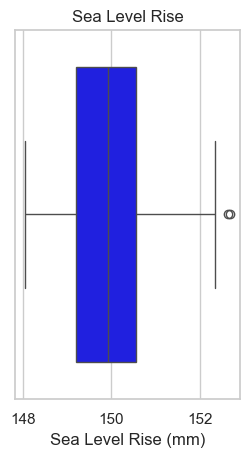

In [61]:

# Boxplot for Temp
plt.subplot(1, 2, 1)
sns.boxplot(x=aggregate_data['Sea Level Rise (mm)'], color='b')
plt.title('Sea Level Rise')


# Arctic Ice Area (million km²)

Arctic Ice Area (million km²)
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


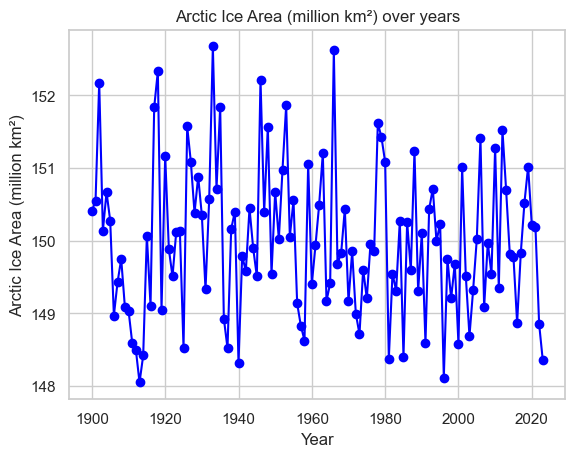

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1981                        14.504589               350.091559   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1981           148.376618                       8.893453  


In [77]:

# Analyze Global Average Temperature (°C) 
summary = aggregate_data['Arctic Ice Area (million km²)'].describe()
print("Arctic Ice Area (million km²)")
print(summary)


# Plotting 
plt.plot(aggregate_data.index, aggregate_data['Sea Level Rise (mm)'],marker='o', color='b', linestyle='-', label='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area (million km²) over years')
plt.xlabel('Year')
plt.ylabel('Arctic Ice Area (million km²)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Arctic Ice Area (million km²)'].quantile(0.25)
Q3 = aggregate_data['Arctic Ice Area (million km²)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Arctic Ice Area (million km²)'] < lower_bound) | (aggregate_data['Arctic Ice Area (million km²)'] > upper_bound)]

# Display the outliers
print(outliers)




## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [29]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here